# Assignment 1 on Natural Language Processing

## Date : 26th July, 2019

### Instructor : Prof. Sudeshna Sarkar

### Teaching Assistants : Ishani Mondal, Debanjana Kar, Sukannya Purkayastha

The central idea of this assignment is to make you familiar with programming in python and also the language modelling task of natural language processing using the python library, nltk. Please find the installation details below.



## Installation of NLTK and Anaconda:

To ensure we are all on the same page, the coding environment will be in `python3`. We suggest downloading 
Anaconda3 and creating a separate environment to do this assignment. <br> 


The link to anaconda3 for Windows and Linux is available here https://docs.anaconda.com/anaconda/install/. <br>
The steps to install NLTK is available on the link: <br>

`sudo pip3 install nltk` <br>
`python3` <br>
`nltk.download()` <br>

To install gensim, use the following command: (detailed tutorial) <br>
`conda install -c conda-forge gensim` <br>

<br>

Note : For the purpose of your convenience, we are also providing you with a demo hands-on ipython notebook explaining the basics of language modelling using nltk.

## Assignment Tasks

Use the corpus given. Ignore the .concept files and use the .txt files for each disease abstract.

### Task A: In this sub-task, you are expected to carry out the following tasks:

**Tokenize** the corpus into sentences and words (for each of the pos and neg class). **Print the number of sentences and words.** <br>
**Perform case-folding** on the corpus. <br>
**Remove the stopwords** from the corpus and print the count of the rest of the non stop-words occurring in the corpus.<br>

In [1]:
#Write the code for Task A

#This cell contains code for reading the text files and creating the corpus of words after removal of stopwords
#as well as the tokenizing the corpus into sentences.

import os
import re
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import sent_tokenize
from nltk.tokenize import RegexpTokenizer

txt_files = []
for file in os.listdir('NCBI_Data'):
        if (file[-4:] == ".txt"):
            txt_files.append('NCBI_Data/' + file)
sorted(txt_files)
# print (txt_files)

corpus = ""
sentences = []
for file in txt_files:
    with open(file) as f:
        file_txt = f.read().lower().strip()
        file_txt = re.sub('[ ]*-[ -]*', '-' , file_txt)
        file_txt = re.sub('[ ]*\'[ \']*', '\'', file_txt) 
        sentence_file = sent_tokenize(file_txt)
        # print(len(sentence_file))
        sentences.extend(sentence_file)
        corpus = corpus + file_txt + ".\n"
# print(corpus)
# print(sentences)

word_tokenizer = RegexpTokenizer('[\w]+[-\'][\w]+|[\w]+')
# word_tokenizer = RegexpTokenizer('[\w]+')
all_words = word_tokenizer.tokenize(corpus)
# print(all_words)
stop_words = set(stopwords.words('english'))
# print(stop_words)
word_tokens = [word for word in all_words if word not in stop_words]
# print(word_tokens)

print("Number of Sentences: ", len(sentences))
print("Total Number of Words: ", len(all_words))
print("Number of Word Tokens: ", len(word_tokens))


Number of Sentences:  197
Total Number of Words:  4017
Number of Word Tokens:  2525


### Task B: In this sub-task, you are expected to carry out the following tasks:

1. **Create the following language models** on the training corpus: <br>
    i.   Unigram <br>
    ii.  Bigram <br>
    iii. Trigram <br>
    iv.  Fourgram <br>

2. **List the top 5 bigrams, trigrams, four-grams (with and without Add-1 smoothing).**
(Note: Please remove those which contain only articles, prepositions, determiners. For Example: “of the”, “in a”, etc).

In [9]:
#Write the code for Task B

#This cell contains code for creation of unigrams, bigrams, trigrams and fourgrams from the
#excess space-stripped, case-folded stopwords free corpus

#Dependecies on previous cells
#    sentences = sent_tokenize(file_txt) from each text file into one list
#    word_tokenizer = RegexpTokenizer('[\w]+[-\'][\w]+|[\w]+')

from nltk.util import ngrams
unigrams=[]
bigrams=[]
trigrams=[]
fourgrams=[] 

for sentence in sentences:
    unigrams.extend(ngrams(word_tokenizer.tokenize(sentence), 1))
    bigrams.extend(ngrams(word_tokenizer.tokenize(sentence), 2))
    trigrams.extend(ngrams(word_tokenizer.tokenize(sentence), 3))
    fourgrams.extend(ngrams(word_tokenizer.tokenize(sentence), 4))


In [10]:
#This cell contains the code for removal of tuples from the grams which contain only stopwords
#After this we print the 10 most frequent grams from each list of uni, bi, tri, and four grams, WITHOUT any smoothing

#Dependecies on previous cells
#    unigrams, bigrams, trigrams, fourgrams

#This function returns False if all the words in the tuple are stopwords, else it returns True
def isTupleInformative(n_gram):
    for word in n_gram:
        if word not in stop_words:
            return True
    return False

print("Without Add-1 Smoothing: \n")

#This function returns the Processed Gram after removal of Non-Informative Tuples, and the Frequency Distribution of the same
def processGrams(n_grams):
    gram_processed = [n_gram for n_gram in n_grams if isTupleInformative(n_gram)]
    gram_fdist = nltk.FreqDist(gram_processed)
    print(len(gram_processed), ":")
    for n_gram in gram_fdist.most_common(10):
        print(n_gram)
    print("")
    return gram_processed, gram_fdist

print("Top 10 Frequent Unigrams out of", end=' ')
uni_processed, uni_fdist = processGrams(unigrams)

print("Top 10 Frequent Bigrams out of", end=' ')
bi_processed, bi_fdist = processGrams(bigrams)

print("Top 10 Frequent Trigrams out of", end=' ')
tri_processed, tri_fdist = processGrams(trigrams)

print("Top 10 Frequent Fourgrams out of", end=' ')
four_processed, four_fdist = processGrams(fourgrams)


Without Add-1 Smoothing: 

Top 10 Frequent Unigrams out of 2525 :
(('gene',), 36)
(('mutation',), 35)
(('mutations',), 31)
(('patients',), 27)
(('found',), 18)
(('deficiency',), 17)
(('disease',), 17)
(('dm',), 16)
(('cancer',), 14)
(('brca1',), 14)

Top 10 Frequent Bigrams out of 3441 :
(('mutations', 'in'), 15)
(('patients', 'with'), 9)
(('factor', 'b'), 9)
(('detected', 'in'), 8)
(('mutation', 'was'), 8)
(('deficiency', 'of'), 8)
(('c2', 'deficiency'), 8)
(('myotonic', 'dystrophy'), 7)
(('age', 'of'), 7)
(('germline', 'mutations'), 7)

Top 10 Frequent Trigrams out of 3587 :
(('mutations', 'in', 'the'), 6)
(('deficiency', 'of', 'the'), 6)
(('germline', 'mutations', 'in'), 6)
(('transmission', 'of', 'congenital'), 5)
(('the', 'rb1', 'gene'), 4)
(('component', 'of', 'complement'), 4)
(('of', 'the', 'disease'), 4)
(('age', 'of', 'onset'), 4)
(('paternal', 'transmission', 'of'), 4)
(('of', 'congenital', 'dm'), 4)

Top 10 Frequent Fourgrams out of 3427 :
(('paternal', 'transmission', 'of'

### With Smoothing

In [11]:
#This cell contains the code where we further process the grams by modifying the probability with Add-1 Smoothing
#After this we print the 10 most frequent grams from each list of uni, bi, tri, and four grams

#Dependecies on previous cells
#    uni_processed, uni_fdist; 
#    bi_processed, bi_fdist;
#    tri_processed, tri_fdist;
#    four_processed, four_fdist;

print("With Add-1 Smoothing: \n")

#This function processes the n-gram by applying Add-1 Smoothing to the probabilities, and returns the smoothed probabilites
def processGramsSmoothing(grams_processed, gram_fdist):
    gram_fdist_1 = {}
    for n_gram in set(grams_processed):
        gram_fdist_1[n_gram] = (1 + gram_fdist[n_gram])/( len(set(grams_processed)) + len(grams_processed) )
    most_frequent_grams = sorted(gram_fdist_1.items(), key = lambda x : x[1], reverse = True)
    print(len(grams_processed), ":")
    for n_gram in most_frequent_grams[:10]:
        print(n_gram)
    print("")
    return gram_fdist_1

print("Top 10 Frequent Unigrams out of", end = ' ')
uni_fdist_1 = processGramsSmoothing(uni_processed, uni_fdist)

print("Top 10 Frequent Bigrams out of", end = ' ')
bi_fdist_1 = processGramsSmoothing(bi_processed, bi_fdist)

print("Top 10 Frequent Trigrams out of", end = ' ')
tri_fdist_1 = processGramsSmoothing(tri_processed, tri_fdist)

print("Top 10 Frequent Fourgrams out of", end = ' ')
four_fdist_1 = processGramsSmoothing(four_processed, four_fdist)
 

With Add-1 Smoothing: 

Top 10 Frequent Unigrams out of 2525 :
(('gene',), 0.010112052473353375)
(('mutation',), 0.009838753757857338)
(('mutations',), 0.008745558895873189)
(('patients',), 0.007652364033889041)
(('found',), 0.005192675594424706)
(('disease',), 0.004919376878928669)
(('deficiency',), 0.004919376878928669)
(('dm',), 0.004646078163432632)
(('brca1',), 0.004099480732440558)
(('cancer',), 0.004099480732440558)

Top 10 Frequent Bigrams out of 3441 :
(('mutations', 'in'), 0.002571933772705353)
(('factor', 'b'), 0.0016074586079408454)
(('patients', 'with'), 0.0016074586079408454)
(('mutation', 'was'), 0.0014467127471467609)
(('c2', 'deficiency'), 0.0014467127471467609)
(('detected', 'in'), 0.0014467127471467609)
(('deficiency', 'of'), 0.0014467127471467609)
(('age', 'of'), 0.0012859668863526765)
(('germline', 'mutations'), 0.0012859668863526765)
(('myotonic', 'dystrophy'), 0.0012859668863526765)

Top 10 Frequent Trigrams out of 3587 :
(('germline', 'mutations', 'in'), 0.00100

### Predict the next word using statistical language modelling

Using the above bigram, trigram, and fourgram models that you just experimented with, **predict the next word given the previous n(=2, 3, 4)-grams** for the sentences below.

In [12]:
str1 = 'A new tumor suppressor gene, PTEN/MMAC1, was isolated recently'
str2 = 'The average age of disease'

In [13]:
#This cell contains the code where we predict the next word from an input string using bi, tri and four grams
#Here we are printing all the words with probabilites equal to the top two probabilities

#Dependecies on previous cells
#    word_tokenizer = RegexpTokenizer('[\w]+[-\'][\w]+|[\w]+')
#    all_words = all the words returned by work_tokenizer on the main corpus (without stopword removal)
#    bi_dist_1, tri_dist_1, four_dist_1

#This function takes a string as input and returns the predicted words with their probabilities in a non-increasing order
def predictNextWord(string_input, N):    
    string_input = word_tokenizer.tokenize(string_input.lower().strip())
    prev_words = string_input[-(N-1):]
        
    N_fdist_1 = dict()
    if N == 2 :
        N_fdist_1 = bi_fdist_1
    if N == 3 :
        N_fdist_1 = tri_fdist_1
    if N == 4 :
        N_fdist_1 = four_fdist_1
    
    predictions = []
    for next_word in set(all_words):
        prediction = tuple(prev_words + [next_word])  
        if prediction in list(N_fdist_1.keys()):
            predictions.append([N_fdist_1[prediction], next_word])
    
    return sorted(predictions, reverse = True)            

#This function takes a string, and the predictions as input and prints all the words having top two probabilities
def printProbableNextWords(string, probable_words):
    unique_probability = set()
    for i in range(len(probable_words)):
        unique_probability.add(probable_words[i][0])
        if (len(unique_probability) > 2):
            break
        print("'", string, "' ", "*", probable_words[i][1], "* ", "- with a probability: ", probable_words[i][0], sep = '')
    print("")

#This function takes the string whose next word is to be predicted and processed it through bi, tri and four grams
def listProbableNextWords(string):
    pred_str_bi = predictNextWord(string, 2)
    print("Predictions in descending order of probability using bigrams: ")
    printProbableNextWords(string, pred_str_bi)

    pred_str_tri = predictNextWord(string, 3)
    print("Predictions in descending order of probability using trigrams: ")
    printProbableNextWords(string, pred_str_tri)

    pred_str_four = predictNextWord(string, 4)
    print("Predictions in descending order of probability using fourgrams: ")
    printProbableNextWords(string, pred_str_four)

#Calling the function to list all the Probable Next Words on the Given Strings
listProbableNextWords(str1)
listProbableNextWords(str2)    


Predictions in descending order of probability using bigrams: 
'A new tumor suppressor gene, PTEN/MMAC1, was isolated recently' *at* - with a probability: 0.00032149172158816913

Predictions in descending order of probability using trigrams: 
'A new tumor suppressor gene, PTEN/MMAC1, was isolated recently' *at* - with a probability: 0.00028814291888776836

Predictions in descending order of probability using fourgrams: 
'A new tumor suppressor gene, PTEN/MMAC1, was isolated recently' *at* - with a probability: 0.0002952465308532625

Predictions in descending order of probability using bigrams: 
'The average age of disease' *severity* - with a probability: 0.00048223758238225364
'The average age of disease' *onset* - with a probability: 0.00048223758238225364
'The average age of disease' *is* - with a probability: 0.00048223758238225364
'The average age of disease' *was* - with a probability: 0.00032149172158816913
'The average age of disease' *tsd* - with a probability: 0.0003214917215

### Task C: In this task, you are to perform the following tasks:

1. **Train word vectors** on the given corpus. In order to train the word vectors on your corpus, using the gensim module (https://radimrehurek.com/gensim/models/word2vec.html) with pre-trained Google word embeddings (GoogleNews-vectors) . For multi-word disease mentions, concatenate each word with a ‘_’.  <br>

2. **Construct a t-SNE plot** of the trained word vectors of the disease mentions.

3. **Repeat experiment 1. and 2.** using the following hyper-parameter settings:
Use window size = 5, 10.<br>
Use embedding dimension = 50, 100, 200.<br>


In [14]:
#Write the code for Task C

#This cell contains the code for pro-processing the corpus to concatenate multi-word diseases with '_'
#by using the disease names given in the .concept files.

#Dependencies on previous cells
#    word_tokenizer = RegexpTokenizer('[\w]+[-\'][\w]+|[\w]+')

conc_files = []
for file in os.listdir('NCBI_Data'):
        if (file[-8:] == ".concept"):
            conc_files.append('NCBI_Data/' + file)
sorted(conc_files)
# print(conc_files)

tokenized_sentences = []
all_diseases = set()
for i in range(len(conc_files)):    
    diseases = dict()
    
    with open(conc_files[i]) as f:
        for line in f.readlines():
            disease = line.split('||')[3]
            diseases[disease] = re.sub('[ -/]', '_', disease)
            all_diseases.add(diseases[disease])
#             print(disease, diseases[disease])
                
    with open(txt_files[i]) as f:
        file_txt = f.read()
        for disease in sorted(diseases.keys(), key=len, reverse=True):
            file_txt = file_txt.replace(disease, diseases[disease])
#         print(file_txt)
        sentence_file = sent_tokenize(file_txt)  
        for sentence in sentence_file:
            tokenized_sentences.append(word_tokenizer.tokenize(sentence))
#             print(tokenized_sentences[-1])


Vector Dimension:  50 
Window Size: 5


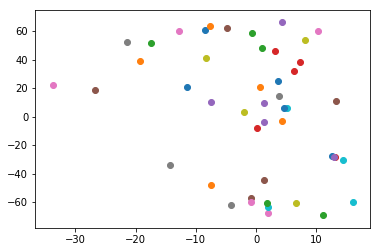


Vector Dimension:  50 
Window Size: 10


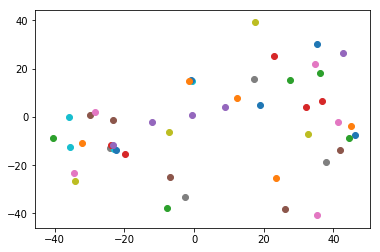


Vector Dimension:  100 
Window Size: 5


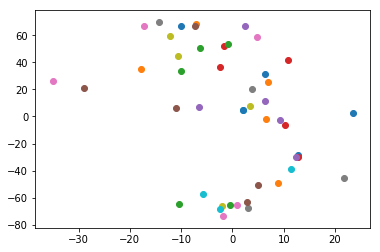


Vector Dimension:  100 
Window Size: 10


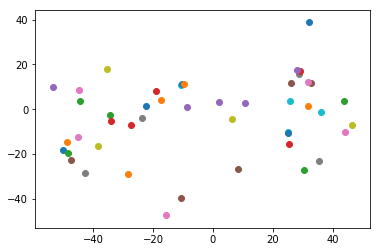


Vector Dimension:  200 
Window Size: 5


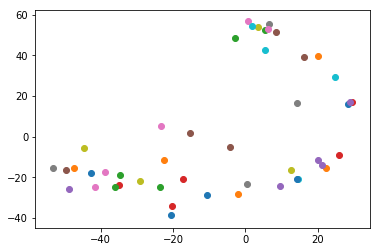


Vector Dimension:  200 
Window Size: 10


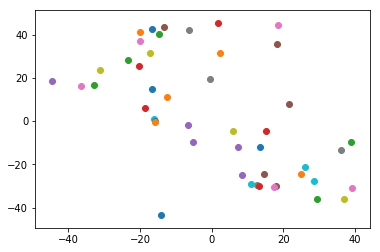

In [16]:
#This cell contains the code for training the tokenized sentences from the pre-processed corpus into vectors
#The Dimension of these Vectors varies as [50, 100, 200] and the Window of tokens to consider varies as [5, 10]\
#We then embed the vectors as a 2-Dimensional t-SNE plot

#Dependencies on previous cells
#    tokenized_sentences = List of List of Tokens in each sentence in the corpus
#    all_diseases = Set of all the diseases' names concatenated with '_' as one token

import numpy as np
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

VECTOR_DIMENSION = [50, 100, 200]
WINDOW_SIZE = [5, 10]

for vector_dimension in VECTOR_DIMENSION:
    for window_size in WINDOW_SIZE:        
        model = Word2Vec(size=vector_dimension, window=window_size, min_count=1)
        model.build_vocab(tokenized_sentences)
        model.train(tokenized_sentences, total_examples=len(tokenized_sentences), epochs=100)

        vector = []
        words = []
        for word in model.wv.vocab:
            vector.append(model.wv[word])
            words.append(word)

        vector_embedding = TSNE(n_components=2).fit_transform(vector)

        for i in range(len(vector_embedding)):
            if words[i] in all_diseases:
                plt.scatter(vector_embedding[i][0], vector_embedding[i][1], label=words[i])
        
        print("Vector Dimension: ", vector_dimension, "\nWindow Size:", window_size)
        plt.show()
        print("")



### Task D: Predict the next word using neural language modelling

Using LSTM Language modelling, you are expected to **train your own word vectors and predict the next word, given the context**.

In [3]:
#code for Task D

import numpy as np
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding


## Prepare the corpus from the .txt files and store it in a string variable i.e data_str. It should contain the 
## sentences splitted by "\n".
import os, glob

os.chdir('NCBI_Data')
data = []
for file in glob.glob("*.txt"):
    f = open(file)
    content = f.read()
    for line in content.split("\n"):
        if(line != ""):
            data.append(line)
os.chdir('..')

# print(data)
data_str = "\n".join(data)
# print(data_str)

# generate the sequence 

def generate_seq(model, tokenizer, max_length, seed_text, n_words):
    
    in_text = seed_text
    prediction = ''
    for i in range(n_words):
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        sequences_to_texts = dict( map(reversed, tokenizer.word_index.items()) )
        word_index = np.argmax(model.predict(np.array([encoded[-2:]])))
        next_word = sequences_to_texts[word_index]
        prediction = next_word + ' '
    return prediction
 
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data_str])

# Write the code for encoding text to sequences here and store in encoded
encoded = tokenizer.texts_to_sequences([data_str])[0]

# retrieve vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# encode 2 words -> 1 word
sequences = list()
for i in range(2, len(encoded)):
    sequence = encoded[i-2:i+1]
    sequences.append(sequence)


print('Total Sequences: %d' % len(sequences))
# pad sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)
# split into input and output elements
sequences = array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
# define model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_length-1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(X, y, epochs=500, verbose=2)
# evaluate model
print(generate_seq(model, tokenizer, max_length-1, 'A new tumor suppressor gene, PTEN/MMAC1, was isolated recently', 1))
print(generate_seq(model, tokenizer, max_length-1, 'The average age of disease', 1))

Vocabulary Size: 1194
Total Sequences: 4117
Max Sequence Length: 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 2, 10)             11940     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_2 (Dense)              (None, 1194)              60894     
Total params: 85,034
Trainable params: 85,034
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
 - 2s - loss: 6.9195 - acc: 0.0537
Epoch 2/500
 - 1s - loss: 6.1270 - acc: 0.0559
Epoch 3/500
 - 1s - loss: 6.0064 - acc: 0.0554
Epoch 4/500
 - 1s - loss: 5.9554 - acc: 0.0551
Epoch 5/500
 - 1s - loss: 5.9139 - acc: 0.0561
Epoch 6/500
 - 1s - loss: 5.8877 - acc: 0.0556
Epoch 7/500
 - 1s - loss: 5.8650 - acc: 0.0573
E

 - 1s - loss: 0.9872 - acc: 0.7488
Epoch 155/500
 - 1s - loss: 0.9758 - acc: 0.7484
Epoch 156/500
 - 1s - loss: 0.9683 - acc: 0.7491
Epoch 157/500
 - 1s - loss: 0.9586 - acc: 0.7479
Epoch 158/500
 - 1s - loss: 0.9502 - acc: 0.7537
Epoch 159/500
 - 1s - loss: 0.9404 - acc: 0.7520
Epoch 160/500
 - 1s - loss: 0.9326 - acc: 0.7525
Epoch 161/500
 - 1s - loss: 0.9232 - acc: 0.7554
Epoch 162/500
 - 1s - loss: 0.9165 - acc: 0.7549
Epoch 163/500
 - 1s - loss: 0.9075 - acc: 0.7561
Epoch 164/500
 - 1s - loss: 0.8999 - acc: 0.7576
Epoch 165/500
 - 1s - loss: 0.8912 - acc: 0.7566
Epoch 166/500
 - 1s - loss: 0.8857 - acc: 0.7612
Epoch 167/500
 - 1s - loss: 0.8769 - acc: 0.7610
Epoch 168/500
 - 1s - loss: 0.8686 - acc: 0.7593
Epoch 169/500
 - 1s - loss: 0.8630 - acc: 0.7600
Epoch 170/500
 - 1s - loss: 0.8556 - acc: 0.7617
Epoch 171/500
 - 1s - loss: 0.8499 - acc: 0.7627
Epoch 172/500
 - 1s - loss: 0.8426 - acc: 0.7637
Epoch 173/500
 - 1s - loss: 0.8361 - acc: 0.7646
Epoch 174/500
 - 1s - loss: 0.8279

Epoch 322/500
 - 1s - loss: 0.4687 - acc: 0.7826
Epoch 323/500
 - 1s - loss: 0.4672 - acc: 0.7846
Epoch 324/500
 - 1s - loss: 0.4674 - acc: 0.7821
Epoch 325/500
 - 1s - loss: 0.4670 - acc: 0.7846
Epoch 326/500
 - 1s - loss: 0.4662 - acc: 0.7877
Epoch 327/500
 - 1s - loss: 0.4650 - acc: 0.7819
Epoch 328/500
 - 1s - loss: 0.4643 - acc: 0.7802
Epoch 329/500
 - 1s - loss: 0.4653 - acc: 0.7843
Epoch 330/500
 - 1s - loss: 0.4634 - acc: 0.7797
Epoch 331/500
 - 1s - loss: 0.4631 - acc: 0.7802
Epoch 332/500
 - 1s - loss: 0.4635 - acc: 0.7872
Epoch 333/500
 - 1s - loss: 0.4626 - acc: 0.7870
Epoch 334/500
 - 1s - loss: 0.4610 - acc: 0.7865
Epoch 335/500
 - 1s - loss: 0.4599 - acc: 0.7858
Epoch 336/500
 - 1s - loss: 0.4605 - acc: 0.7778
Epoch 337/500
 - 1s - loss: 0.4587 - acc: 0.7829
Epoch 338/500
 - 1s - loss: 0.4587 - acc: 0.7843
Epoch 339/500
 - 1s - loss: 0.4579 - acc: 0.7855
Epoch 340/500
 - 1s - loss: 0.4580 - acc: 0.7838
Epoch 341/500
 - 1s - loss: 0.4560 - acc: 0.7853
Epoch 342/500
 - 1s 

 - 1s - loss: 0.4169 - acc: 0.7812
Epoch 490/500
 - 1s - loss: 0.4180 - acc: 0.7816
Epoch 491/500
 - 1s - loss: 0.4183 - acc: 0.7795
Epoch 492/500
 - 1s - loss: 0.4177 - acc: 0.7814
Epoch 493/500
 - 1s - loss: 0.4168 - acc: 0.7848
Epoch 494/500
 - 1s - loss: 0.4175 - acc: 0.7778
Epoch 495/500
 - 1s - loss: 0.4175 - acc: 0.7821
Epoch 496/500
 - 1s - loss: 0.4170 - acc: 0.7765
Epoch 497/500
 - 1s - loss: 0.4166 - acc: 0.7812
Epoch 498/500
 - 1s - loss: 0.4155 - acc: 0.7809
Epoch 499/500
 - 1s - loss: 0.4179 - acc: 0.7855
Epoch 500/500
 - 1s - loss: 0.4172 - acc: 0.7841
at 
concordance 
